In [1]:
# Ceci est un commentaire

print("Hello word!!")

Hello word!!


# Bienvenue dans l'exercice d'initiation à la formation de Data Analyst.


*Avant d'attaquer directement l'exercice, parlons un peu de l'environnement. Vous êtes actuellement en train d'utilisation un notebook python grâce à l'application Google Colab.*

*Le notebook python est très apprécié des chercheurs (et donc des Data Analysts) car il permet de mêler code et ressources textuel ou graphique (La preuve en est, vous êtes en train de lire du texte au milieu d'un environement de code)*

## L'exercice
Nous avons récupérer un set de données  qui liste les différentes caractéristiques d'iris. 
Notre jeux de données contient des informations sur les longueurs et largeurs de pétale et de sépale.

<img src="http://images.innoveduc.fr/data/initiation_colab/petal-sepal.jpg" width="280">

C'est en fonction de ces informations que nous souhaitons déterminer la variété d'iris. Notre échantillon de données concerne 3 espèces dont les noms anglophones sont: "virginica", "setosa" et "versicolor"

Ils vous est donc demandé de créer un système de classification qui permet de déterminer.

Cependant le processus d'analyse n'est pas un long fleuve tranquil, il arrive que les données ne soient pas exploitables pour différentes raisons: Manque d'informations, informations erronnées, outliers.


## Challenge 

Ton rôle est donc de corriger les erreurs qui ont été reportées dans ce jeux de données.

La correction de ces erreurs permettra dans un premier temps la visualisation de ces données, puis au système de classification de fonctionner.

Le but de cet exercice est d'entrainer une intelligence artificielle capable de classer les mesures par espèces avec un taux de précision d'au moins 80%.


In [0]:
# Ces lignes de code permettent de charger les outils nécessaire à la réalisation de l'exercice
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_rows', 150)

In [27]:
# On charge le jeux de données à corriger
df = pd.read_csv("http://images.innoveduc.fr/data/initiation_colab/iris_trainset.csv")

# Pour modifier la longueur de sépal de la ligne 102
df['sepal_length'][102] = 4.5
df['sepal_length'][13] = 5
df['sepal_length'][30] = 5.4
df['sepal_width'][22] = 3
df['sepal_width'][16] = 3
df['sepal_width'][61] = 3

df = df.fillna(0)
df = df.fillna(df.mean())
df = df.dropna()
df = df.interpolate()
df = df[df.species != "Unknown"]

df

# df.sort_values('sepal_length')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to b

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,2.70,4.90,1.80,virginica
1,4.6,3.10,1.50,0.20,setosa
2,7.1,3.00,5.90,2.10,virginica
3,6.1,3.00,4.60,1.40,versicolor
4,5.2,4.10,1.50,0.10,setosa
5,5.1,3.70,1.50,0.40,setosa
6,4.9,3.00,1.40,0.20,setosa
7,5.6,2.70,4.20,1.30,versicolor
8,6.0,2.90,4.50,1.50,versicolor
9,4.4,3.20,1.30,0.20,setosa


# Data visualisation

In [26]:
# Visualisation diverse
# fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
# fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
# fig = px.scatter(df, x="sepal_width", y="petal_length", color="species", marginal_x="histogram", trendline="ols")
# fig = px.scatter(df, x="sepal_width", y="petal_length", color="species", marginal_x="histogram")
fig = px.scatter_matrix(df, color='species')

fig.show()

# Machine learning: Classification des variétés

Félicitations! Tu as une précision de 97%


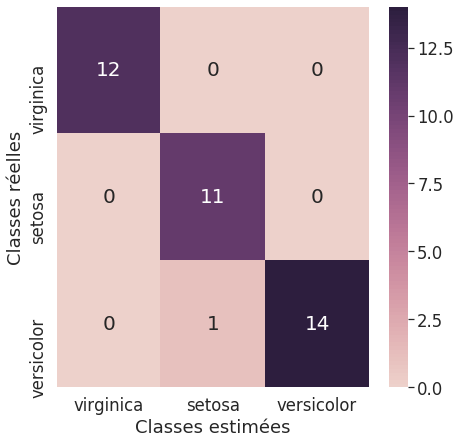

In [29]:
# On charge le jeux de données de vérification
dfPred = pd.read_csv("http://images.innoveduc.fr/data/initiation_colab/iris_predset.csv")

X_train = df[['sepal_length', 'sepal_width', 'petal_length',
       'petal_width']]
X_test = dfPred[['sepal_length', 'sepal_width', 'petal_length',
       'petal_width']]
y_train = df['species']
y_test = dfPred['species']

# On entraine la machine
# cas des plus proches voisins
# on choisi de maniere arbitraire puis on ajuste, ici avec 100 on avait 28% de precision alors qu'avec 15 on 97%
knnR = KNeighborsClassifier(n_neighbors=15)
knnR.fit(X_train, y_train)
y_pred = knnR.predict(X_test)

# On vérifie nos variétés prédites avec les variétés relevés
accuracy = accuracy_score(y_test, y_pred) * 100

# Affichage de la confusion matrix
labels = df['species'].unique()
matrix = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(7,7))  
fig = sns.heatmap(matrix, annot=True,xticklabels=labels, yticklabels=labels,
                  annot_kws={"size": 20}, cmap=sns.cubehelix_palette(100))
axes = fig.set(ylabel='Classes réelles', xlabel='Classes estimées')

fig = px.scatter_3d(dfPred, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig.show()

if accuracy > 80:
  print("Félicitations! Tu as une précision de %i%%" % accuracy)
else:
  print("La précision est de %i%%. Essaie encore!" % accuracy)


# Reconnaissance de chiffres

Vous allez maintenant pouvoir tester ce que vous avez appris sur un nouveau dataset. 
Vous allez apprendre un classifieur qui reconnait un chiffre écrit à la main.


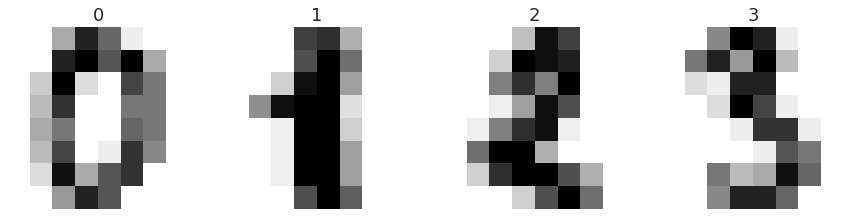



Representation du 0 en mémoire:

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [30]:
# On charge le jeu de données "digits"
digits = datasets.load_digits()

# Ce jeu de données est composé d'images en noir et blanc de 8x8 pixels

# Affichage de 4 images de ce jeu
nplots = 4
fig = plt.figure(figsize=(15,15))
for j in range(nplots):
    plt.subplot(1,4,j+1)
    plt.imshow(digits.images[j], cmap='binary')
    plt.title(digits.target[j])
    plt.axis('off')
plt.show()

print("\n\nRepresentation du 0 en mémoire:\n")

print(digits.images[0])



In [0]:
# Pour entrainer notre Knn on doit d'abord "applatir" la représentation de l'image (la transformer en matrice) 

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Séparation des données en un ensemble d'entrainement et de test. 
# test_size correspond à la proportion d'exemple qui va être attribué au test
# Avec test_size à 0.3 on va entrainer notre système sur 70% des données et tester sur les 30% restant.
# N'hesitez pas à modifier ce chiffre!

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.7, shuffle=True)


In [40]:
# Et maintenant c'est à vous! 

# Entrainez un classifieur KNN sur X_train Y_train.
knnR = KNeighborsClassifier(n_neighbors=20)
knnR.fit(X_train, y_train)


# On vérifie nos variétés prédites avec les variétés relevés
accuracy = accuracy_score(y_test, y_pred) * 100

# Puis faites des prédictions sur X_test.
y_pred = knnR.predict(X_test)


# Affichez maintenant la précision de votre système.
if accuracy > 80:
  print("Félicitations! Tu as une précision de %i%%" % accuracy)
else:
  print("La précision est de %i%%. Essaie encore!" % accuracy)
# Si les resultats sont mauvais le problème vient peut etre de k ou de la proportion choisi pour séparer les données

# Vous pouvez aussi afficher la matrice de confusion.
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
# fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
# fig = px.scatter(df, x="sepal_width", y="petal_length", color="species", marginal_x="histogram", trendline="ols")
# fig = px.scatter(df, x="sepal_width", y="petal_length", color="species", marginal_x="histogram")
# fig = px.scatter_matrix(df, color='species')

fig.show()


ValueError: ignored